### Summary

The overall goal is concerned with determining demographic factors that correlate with SAT score.

The main data frame is the SAT Results data set. It is kind of the response or dependent data frame. The goal is to detect correlations or make predictions of SAT results using the demographic data sets like class size, school demographics, graduation results and so on.

Two different methods are used to import the data files.
Using an API to import the data as json-files. 
Reading in files from directory using glob and store theses in a dictionary.

The relationships between the different  data sets can easier be investigated by merging these into one data frame.
For this purpose different steps of data preprocessing must be taken.
For example a unique identifier (primary key) must be created, which allows to join the data sets.

Additional research question:

New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race, income, and gender with SAT scores is a good way to determine whether the SAT is a fair test. For example, if certain racial groups consistently perform better on the SAT, we would have some evidence that the SAT is unfair.

In [1]:
#ls

pwd

In [2]:
%cd C:\Users\gamarandor\

C:\Users\gamarandor


In [3]:
import os
os.getcwd()

'C:\\Users\\gamarandor'

#### Import packages

In [4]:
import pandas as pd
import json
import requests
import re
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns

#### Import data sets

#### Import data set 1: 2012 SAT Results - for New York City

<p>
The most recent school level results for New York City on the SAT. Results are available at the school level for the graduating seniors of 2012. 
Records contain 2012 College-bound seniors mean SAT scores taken during SY 2012.
</p>
<p>
<a href="https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4/data">New York City Open Data</a>
</p>
<p>
The data set is read in dynamically using the SODA API with Json and stored finally in a pandas data frame.
</p>

In [5]:
# Alternative read in static data set from download
# sat= pd.read_csv("2012_SAT_Results.csv", header=0, error_bad_lines=False, sep="," )

url = "https://data.cityofnewyork.us/resource/734v-jeq5.json"
# r = requests.get(url)
r1 = requests.get(url)
json_data_1 = r1.json()
print(type(json_data_1))
print(json_data_1[0:2])
# Using json gives a list of dictionaries

<class 'list'>
[{'dbn': '01M292', 'num_of_sat_test_takers': '29', 'sat_critical_reading_avg_score': '355', 'sat_math_avg_score': '404', 'sat_writing_avg_score': '363', 'school_name': 'HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES'}, {'dbn': '01M448', 'num_of_sat_test_takers': '91', 'sat_critical_reading_avg_score': '383', 'sat_math_avg_score': '423', 'sat_writing_avg_score': '366', 'school_name': 'UNIVERSITY NEIGHBORHOOD HIGH SCHOOL'}]


In [6]:
sat_2012 = pd.DataFrame.from_dict(json_data_1)
print(type(sat_2012 ))
sat_2012.head()

<class 'pandas.core.frame.DataFrame'>


,dbn,num_of_sat_test_takers,sat_critical_reading_avg_score,sat_math_avg_score,sat_writing_avg_score,school_name
0,01M292,29,355,404,363,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES
1,01M448,91,383,423,366,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
2,01M450,70,377,402,370,EAST SIDE COMMUNITY SCHOOL
3,01M458,7,414,401,359,FORSYTH SATELLITE ACADEMY
4,01M509,44,390,433,384,MARTA VALLE HIGH SCHOOL


In [7]:
sat_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
dbn                               478 non-null object
num_of_sat_test_takers            478 non-null object
sat_critical_reading_avg_score    478 non-null object
sat_math_avg_score                478 non-null object
sat_writing_avg_score             478 non-null object
school_name                       478 non-null object
dtypes: object(6)
memory usage: 22.5+ KB


It seems all column values are of data format non-null object, which are most likely strings.
Take a closer look on the data type with a function.

Determine basic data type

In [8]:
def data_type_format(df):
    type_dict = dict()
    for counter, columnname in enumerate(df.columns.values):
        type_dict[columnname]  = type(df.loc[1,columnname])
    return(type_dict) 
        
data_type_format(sat_2012)

{'dbn': str,
 'num_of_sat_test_takers': str,
 'sat_critical_reading_avg_score': str,
 'sat_math_avg_score': str,
 'sat_writing_avg_score': str,
 'school_name': str}

All observations are of data type "string", while other than DBN and SCHOOL NAME all column are of numeric type.
In the data cleaning process these columns should be turned into numeric formats, maybe integer.

In [9]:
sat_2012.isnull().sum()

dbn                               0
num_of_sat_test_takers            0
sat_critical_reading_avg_score    0
sat_math_avg_score                0
sat_writing_avg_score             0
school_name                       0
dtype: int64

None null values.

#### Import data set 1: 2010-2011 Class Size - School-level detail

Average class sizes for each school, by grade and program type (General Education, 
Self-Contained Special Education, Collaborative Team Teaching (CTT)) for grades K-9 
(where grade 9 is not reported by subject area), and for grades 5-9 (where available) and 9-12, 
aggregated by program type (General Education, CTT, and Self-Contained Special Education) and core course 
(e.g. English 9, Integrated Algebra, US History, etc.).

In [10]:
url = "https://data.cityofnewyork.us/resource/urz7-pzb3.json"
r2 = requests.get(url)
json_data_2 = r2.json()
class_size = pd.DataFrame.from_dict(json_data_2)


In [11]:
class_size.head()

,average_class_size,borough,core_course_ms_core_and_9_12_only_,core_subject_ms_core_and_9_12_only_,csd,data_source,grade_,number_of_sections,number_of_students_seats_filled,program_type,school_code,school_name,schoolwide_pupil_teacher_ratio,service_category_k_9_only_,size_of_largest_class,size_of_smallest_class
0,19.0,M,-,-,1,ATS,0K,1,19,GEN ED,M015,P.S. 015 Roberto Clemente,NaN,-,19,19
1,21.0,M,-,-,1,ATS,0K,1,21,CTT,M015,P.S. 015 Roberto Clemente,NaN,-,21,21
2,17.0,M,-,-,1,ATS,01,1,17,GEN ED,M015,P.S. 015 Roberto Clemente,NaN,-,17,17
3,17.0,M,-,-,1,ATS,01,1,17,CTT,M015,P.S. 015 Roberto Clemente,NaN,-,17,17
4,15.0,M,-,-,1,ATS,02,1,15,GEN ED,M015,P.S. 015 Roberto Clemente,NaN,-,15,15


In [12]:
class_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
average_class_size                     935 non-null object
borough                                1000 non-null object
core_course_ms_core_and_9_12_only_     935 non-null object
core_subject_ms_core_and_9_12_only_    935 non-null object
csd                                    1000 non-null object
data_source                            935 non-null object
grade_                                 935 non-null object
number_of_sections                     935 non-null object
number_of_students_seats_filled        935 non-null object
program_type                           935 non-null object
school_code                            1000 non-null object
school_name                            1000 non-null object
schoolwide_pupil_teacher_ratio         65 non-null object
service_category_k_9_only_             935 non-null object
size_of_largest_class                  935 non-null object
size_o

In [13]:
data_type_format(class_size)

{'average_class_size': str,
 'borough': str,
 'core_course_ms_core_and_9_12_only_': str,
 'core_subject_ms_core_and_9_12_only_': str,
 'csd': str,
 'data_source': str,
 'grade_': str,
 'number_of_sections': str,
 'number_of_students_seats_filled': str,
 'program_type': str,
 'school_code': str,
 'school_name': str,
 'schoolwide_pupil_teacher_ratio': float,
 'service_category_k_9_only_': str,
 'size_of_largest_class': str,
 'size_of_smallest_class': str}

E.g. data_type_format and size_of_smallest_class are integers but have data type string.

Is null?

In [14]:
class_size.isnull().sum()

average_class_size                      65
borough                                  0
core_course_ms_core_and_9_12_only_      65
core_subject_ms_core_and_9_12_only_     65
csd                                      0
data_source                             65
grade_                                  65
number_of_sections                      65
number_of_students_seats_filled         65
program_type                            65
school_code                              0
school_name                              0
schoolwide_pupil_teacher_ratio         935
service_category_k_9_only_              65
size_of_largest_class                   65
size_of_smallest_class                  65
dtype: int64

There are substantial null values. "schoolwide_pupil_teacher_ratio" has 935 from 1000 observations. A strategy
to handle null values is necessary.

#### Import data set 3: 2006 - 2012 School Demographics and Accountability Snapshot
<p>
Annual school accounts of NYC public school student populations served by grade, special programs, ethnicity, gender and Title I funded programs. 
</p>

In [15]:
def df_from_json(url):
    """Get json file from url and convert the dict into a df"""
    # url as string
    r = requests.get(url)
    json_data = r.json()
    df = pd.DataFrame.from_dict(json_data)
    return df


In [16]:
demographics = df_from_json("https://data.cityofnewyork.us/resource/ihfw-zy9j.json") 

In [17]:
demographics.head()

,asian_num,asian_per,black_num,black_per,ctt_num,dbn,ell_num,ell_percent,female_num,female_per,...,male_per,name,prek,schoolyear,selfcontained_num,sped_num,sped_percent,total_enrollment,white_num,white_per
0,10,3.6,74,26.3,25,01M015,36,12.8,123,43.8,...,56.2,P.S. 015 ROBERTO CLEMENTE,15,20052006,9,57,20.3,281,5,1.8
1,18,7.4,68,28,19,01M015,38,15.6,103,42.4,...,57.6,P.S. 015 ROBERTO CLEMENTE,15,20062007,15,55,22.6,243,4,1.6
2,16,6.1,77,29.5,20,01M015,52,19.9,118,45.2,...,54.8,P.S. 015 ROBERTO CLEMENTE,18,20072008,14,60,23,261,7,2.7
3,16,6.3,75,29.8,21,01M015,48,19,103,40.9,...,59.1,P.S. 015 ROBERTO CLEMENTE,17,20082009,17,62,24.6,252,7,2.8
4,16,7.7,67,32.2,14,01M015,40,19.2,84,40.4,...,59.6,P.S. 015 ROBERTO CLEMENTE,16,20092010,14,46,22.1,208,6,2.9


In [18]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
asian_num            1000 non-null object
asian_per            1000 non-null object
black_num            1000 non-null object
black_per            1000 non-null object
ctt_num              836 non-null object
dbn                  1000 non-null object
ell_num              978 non-null object
ell_percent          986 non-null object
female_num           998 non-null object
female_per           1000 non-null object
fl_percent           849 non-null object
frl_percent          449 non-null object
grade1               496 non-null object
grade10              546 non-null object
grade11              532 non-null object
grade12              514 non-null object
grade2               492 non-null object
grade3               491 non-null object
grade4               497 non-null object
grade5               496 non-null object
grade6               369 non-null object
grade7               361 no

In [19]:
data_type_format(demographics)

{'asian_num': str,
 'asian_per': str,
 'black_num': str,
 'black_per': str,
 'ctt_num': str,
 'dbn': str,
 'ell_num': str,
 'ell_percent': str,
 'female_num': str,
 'female_per': str,
 'fl_percent': str,
 'frl_percent': float,
 'grade1': str,
 'grade10': float,
 'grade11': float,
 'grade12': float,
 'grade2': str,
 'grade3': str,
 'grade4': str,
 'grade5': str,
 'grade6': float,
 'grade7': float,
 'grade8': float,
 'grade9': float,
 'hispanic_num': str,
 'hispanic_per': str,
 'k': str,
 'male_num': str,
 'male_per': str,
 'name': str,
 'prek': str,
 'schoolyear': str,
 'selfcontained_num': str,
 'sped_num': str,
 'sped_percent': str,
 'total_enrollment': str,
 'white_num': str,
 'white_per': str}

Several variables of data type string are numeric values. For example asian_num is of type integer.

In [20]:
demographics.isnull().sum()

asian_num              0
asian_per              0
black_num              0
black_per              0
ctt_num              164
dbn                    0
ell_num               22
ell_percent           14
female_num             2
female_per             0
fl_percent           151
frl_percent          551
grade1               504
grade10              454
grade11              468
grade12              486
grade2               508
grade3               509
grade4               503
grade5               504
grade6               631
grade7               639
grade8               639
grade9               463
hispanic_num           0
hispanic_per           0
k                    502
male_num               6
male_per               0
name                   0
prek                 568
schoolyear             0
selfcontained_num    215
sped_num               8
sped_percent           0
total_enrollment       0
white_num              0
white_per              0
dtype: int64

There are substantial null-values. I particular the grade-variables have ca. 50 percent null values.
A strategy to handle missing data is to be developed.

#### Import data set 3: 2005-2010 Graduation Outcomes - School

<p>
Graduation Outcomes - Cohorts of 2001 through 2006 (Classes of 2005 through 2010)
The New York State calculation method was first adopted for the Cohort of 2001 (Class of 2005). The cohort consists of 
all students who first entered 9th grade in a given school year.
</p>

In [21]:
graduation = df_from_json("https://data.cityofnewyork.us/resource/ns8x-c6af.json") 

In [22]:
graduation.head()

,advanced_regents_n,advanced_regents_of_cohort,advanced_regents_of_grads,cohort,dbn,demographic,dropped_out_n,dropped_out_of_cohort,local_n,local_of_cohort,...,regents_w_o_advanced_of_grads,school_name,still_enrolled_n,still_enrolled_of_cohort,total_cohort,total_grads_n,total_grads_of_cohort,total_regents_n,total_regents_of_cohort,total_regents_of_grads
0,s,NaN,NaN,2003,01M292,Total Cohort,s,NaN,s,NaN,...,NaN,HENRY STREET SCHOOL FOR INTERNATIONAL,s,NaN,5,s,NaN,s,NaN,NaN
1,0,0,0,2004,01M292,Total Cohort,3,5.5,20,36.4,...,45.9,HENRY STREET SCHOOL FOR INTERNATIONAL,15,27.3,55,37,67.3,17,30.9,45.9
2,0,0,0,2005,01M292,Total Cohort,9,14.1,16,25,...,62.8,HENRY STREET SCHOOL FOR INTERNATIONAL,9,14.1,64,43,67.2,27,42.2,62.8
3,0,0,0,2006,01M292,Total Cohort,11,14.1,7,9,...,83.7,HENRY STREET SCHOOL FOR INTERNATIONAL,16,20.5,78,43,55.1,36,46.2,83.7
4,0,0,0,2006 Aug,01M292,Total Cohort,11,14.1,7,9,...,84.1,HENRY STREET SCHOOL FOR INTERNATIONAL,15,19.2,78,44,56.4,37,47.4,84.1


In [23]:
graduation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
advanced_regents_n                1000 non-null object
advanced_regents_of_cohort        884 non-null object
advanced_regents_of_grads         882 non-null object
cohort                            1000 non-null object
dbn                               1000 non-null object
demographic                       1000 non-null object
dropped_out_n                     1000 non-null object
dropped_out_of_cohort             884 non-null object
local_n                           1000 non-null object
local_of_cohort                   884 non-null object
local_of_grads                    882 non-null object
regents_w_o_advanced_n            1000 non-null object
regents_w_o_advanced_of_cohort    884 non-null object
regents_w_o_advanced_of_grads     882 non-null object
school_name                       1000 non-null object
still_enrolled_n                  1000 non-null object
still_enrolled_of_coh

In [24]:
data_type_format(graduation)

{'advanced_regents_n': str,
 'advanced_regents_of_cohort': str,
 'advanced_regents_of_grads': str,
 'cohort': str,
 'dbn': str,
 'demographic': str,
 'dropped_out_n': str,
 'dropped_out_of_cohort': str,
 'local_n': str,
 'local_of_cohort': str,
 'local_of_grads': str,
 'regents_w_o_advanced_n': str,
 'regents_w_o_advanced_of_cohort': str,
 'regents_w_o_advanced_of_grads': str,
 'school_name': str,
 'still_enrolled_n': str,
 'still_enrolled_of_cohort': str,
 'total_cohort': str,
 'total_grads_n': str,
 'total_grads_of_cohort': str,
 'total_regents_n': str,
 'total_regents_of_cohort': str,
 'total_regents_of_grads': str}

Several numeric variables are stored as strings.

In [25]:
graduation.isnull().sum()

advanced_regents_n                  0
advanced_regents_of_cohort        116
advanced_regents_of_grads         118
cohort                              0
dbn                                 0
demographic                         0
dropped_out_n                       0
dropped_out_of_cohort             116
local_n                             0
local_of_cohort                   116
local_of_grads                    118
regents_w_o_advanced_n              0
regents_w_o_advanced_of_cohort    116
regents_w_o_advanced_of_grads     118
school_name                         0
still_enrolled_n                    0
still_enrolled_of_cohort          116
total_cohort                        0
total_grads_n                       0
total_grads_of_cohort             116
total_regents_n                     0
total_regents_of_cohort           116
total_regents_of_grads            118
dtype: int64

Substantial null values.

#### Import data set 4: 2014 - 2015 DOE High School Directory

In [26]:
highschool = df_from_json("https://data.cityofnewyork.us/resource/2u2u-zka4.json") 

In [27]:
highschool.head(2)

,:@computed_region_92fq_4b7q,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_sbqj_enih,:@computed_region_yeji_bk3q,addtl_info1,addtl_info2,advancedplacement_courses,bbl,bin,...,school_name,school_sports,school_type,se_services,start_time,state_code,subway,total_students,website,zip
0,47,20529,51,59,3,"Uniform Required: plain white collared shirt, ...","Extended Day Program, Student Summer Orientati...","Calculus AB, English Language and Composition,...",4157360001,4300730,...,Frederick Douglass Academy VI High School,"Step Team, Modern Dance, Hip Hop Dance",NaN,This school will provide students with disabil...,7:45 AM,NY,A to Beach 25th St-Wavecrest,412,http://schools.nyc.gov/schoolportals/27/Q260,11691
1,45,17616,21,35,2,Our school requires completion of a Common Cor...,NaN,NaN,3068830001,3186454,...,Life Academy High School for Film and Music,NaN,NaN,This school will provide students with disabil...,8:15 AM,NY,D to 25th Ave ; N to Ave U ; N to Gravesend - ...,260,http://schools.nyc.gov/schoolportals/21/K559,11214


In [28]:
# highschool.info()

In [29]:
data_type_format(highschool)

{':@computed_region_92fq_4b7q': str,
 ':@computed_region_efsh_h5xi': str,
 ':@computed_region_f5dn_yrer': str,
 ':@computed_region_sbqj_enih': str,
 ':@computed_region_yeji_bk3q': str,
 'addtl_info1': str,
 'addtl_info2': float,
 'advancedplacement_courses': float,
 'bbl': str,
 'bin': str,
 'boro': str,
 'building_code': str,
 'bus': str,
 'campus_name': str,
 'census_tract': str,
 'city': str,
 'community_board': str,
 'council_district': str,
 'dbn': str,
 'ell_programs': str,
 'end_time': str,
 'expgrade_span_max': float,
 'expgrade_span_min': float,
 'extracurricular_activities': str,
 'fax_number': str,
 'grade_span_max': str,
 'grade_span_min': str,
 'language_classes': str,
 'location_1': dict,
 'location_1_address': str,
 'location_1_city': str,
 'location_1_state': str,
 'location_1_zip': str,
 'nta': str,
 'number_programs': str,
 'online_ap_courses': str,
 'online_language_courses': float,
 'overview_paragraph': str,
 'partner_cbo': str,
 'partner_corporate': str,
 'partner

In [30]:
highschool.isnull().sum()

:@computed_region_92fq_4b7q           0
:@computed_region_efsh_h5xi           1
:@computed_region_f5dn_yrer           0
:@computed_region_sbqj_enih           0
:@computed_region_yeji_bk3q           0
addtl_info1                          81
addtl_info2                         204
advancedplacement_courses            95
bbl                                   4
bin                                   4
boro                                  0
building_code                         0
bus                                   0
campus_name                           0
census_tract                          3
city                                  0
community_board                       3
council_district                      3
dbn                                   0
ell_programs                          0
end_time                              4
expgrade_span_max                   402
expgrade_span_min                   404
extracurricular_activities            0
fax_number                            0


Import data set 4: 2012 SAT Results

In [31]:
sat_results = df_from_json("https://data.cityofnewyork.us/resource/734v-jeq5.json") 


In [32]:
sat_results.head(3)

,dbn,num_of_sat_test_takers,sat_critical_reading_avg_score,sat_math_avg_score,sat_writing_avg_score,school_name
0,01M292,29,355,404,363,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES
1,01M448,91,383,423,366,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
2,01M450,70,377,402,370,EAST SIDE COMMUNITY SCHOOL


In [33]:
sat_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
dbn                               478 non-null object
num_of_sat_test_takers            478 non-null object
sat_critical_reading_avg_score    478 non-null object
sat_math_avg_score                478 non-null object
sat_writing_avg_score             478 non-null object
school_name                       478 non-null object
dtypes: object(6)
memory usage: 22.5+ KB


In [34]:
data_type_format(sat_results)

{'dbn': str,
 'num_of_sat_test_takers': str,
 'sat_critical_reading_avg_score': str,
 'sat_math_avg_score': str,
 'sat_writing_avg_score': str,
 'school_name': str}

In [35]:
sat_results.isnull().sum()

dbn                               0
num_of_sat_test_takers            0
sat_critical_reading_avg_score    0
sat_math_avg_score                0
sat_writing_avg_score             0
school_name                       0
dtype: int64

#### Reading in files from directory using glob and store theses in a dictionary<br>
(The data files are not updated and remain static.)

In [36]:
# Create a list from csv-files stored in a directory schools
schools_list = []
for name in glob.glob("data-master/schools/*csv"):
    # Use os.path.basename to retrieve only the name without path
    name_none_path = os.path.basename(name)
    schools_list.append(name_none_path)
    
print(schools_list)

['AP__College_Board.csv', 'Class_Size.csv', 'Graduation_Outcomes.csv', 'High_School_Directory.csv', 'SAT_Results.csv', 'School_Demographics.csv', 'School_Level.csv']


In [37]:
# Create a dictionary whereby key names are the names of the csv files without the suffix ".csv"

schools_data = dict()

for f in schools_list:
    d = pd.read_csv("data-master/schools/{0}".format(f)) 
    key_name = f.replace(".csv", "")
    schools_data[key_name] = d

print(schools_data.keys())    

dict_keys(['AP__College_Board', 'Class_Size', 'Graduation_Outcomes', 'High_School_Directory', 'SAT_Results', 'School_Demographics', 'School_Level'])


In [38]:
print(schools_data["SAT_Results"].head(5))

      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2  01M450                     EAST SIDE COMMUNITY SCHOOL   
3  01M458                      FORSYTH SATELLITE ACADEMY   
4  01M509                        MARTA VALLE HIGH SCHOOL   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   
1                     91                             383                 423   
2                     70                             377                 402   
3                      7                             414                 401   
4                     44                             390                 433   

  SAT Writing Avg. Score  
0                    363  
1                    366  
2                    370  
3                    359  
4                    38

Displaying the first five rows of the dataframe associated with the key.

In [39]:
for key in schools_data.keys():
    print(schools_data[key].columns.values)

['DBN' 'SchoolName' 'AP Test Takers ' 'Total Exams Taken'
 'Number of Exams with scores 3 4 or 5']
['CSD' 'BOROUGH' 'SCHOOL CODE' 'SCHOOL NAME' 'GRADE ' 'PROGRAM TYPE'
 'CORE SUBJECT (MS CORE and 9-12 ONLY)'
 'CORE COURSE (MS CORE and 9-12 ONLY)' 'SERVICE CATEGORY(K-9* ONLY)'
 'NUMBER OF STUDENTS / SEATS FILLED' 'NUMBER OF SECTIONS'
 'AVERAGE CLASS SIZE' 'SIZE OF SMALLEST CLASS' 'SIZE OF LARGEST CLASS'
 'DATA SOURCE' 'SCHOOLWIDE PUPIL-TEACHER RATIO']
['Demographic' 'DBN' 'School Name' 'Cohort' 'Total Cohort'
 'Total Grads - n' 'Total Grads - % of cohort' 'Total Regents - n'
 'Total Regents - % of cohort' 'Total Regents - % of grads'
 'Advanced Regents - n' 'Advanced Regents - % of cohort'
 'Advanced Regents - % of grads' 'Regents w/o Advanced - n'
 'Regents w/o Advanced - % of cohort' 'Regents w/o Advanced - % of grads'
 'Local - n' 'Local - % of cohort' 'Local - % of grads'
 'Still Enrolled - n' 'Still Enrolled - % of cohort' 'Dropped Out - n'
 'Dropped Out - % of cohort']
['dbn' 'sch

Most df have a dbn identification column. This identification variable is usefull for combining the data frames.

Read in surveys of parents, teachers, and students at each school<br>
(Also data on surveys from New York City district 75)

In [40]:
all_survey = pd.read_csv("data-master/schools/all_survey.txt", delimiter="\t", encoding="windows-1252")
d75_survey = pd.read_csv("data-master/schools/d75_survey.txt", delimiter="\t", encoding="windows-1252")
#  pd.concat([x,y], axis=0)
survey  = pd.concat([all_survey, d75_survey], axis=0)
survey.head(3)

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0


In [41]:
survey.shape

(1702, 2773)

There are 2773 columns. Which variables are needed out of this?

In [42]:
survey.columns.values[0:10]

array(['N_p', 'N_s', 'N_t', 'aca_p_11', 'aca_s_11', 'aca_t_11',
       'aca_tot_11', 'bn', 'com_p_11', 'com_s_11'], dtype=object)

In [43]:
survey.isnull().sum()[0:10]

N_p             6
N_s           666
N_t             2
aca_p_11        6
aca_s_11      666
aca_t_11        2
aca_tot_11      0
bn              0
com_p_11        6
com_s_11      666
dtype: int64

Relevant variables of the survey data

In [44]:
relevant_surveyvariables = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", 
                            "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11",
                            "com_tot_11", "eng_tot_11", "aca_tot_11"]

In [45]:
survey["DBN"] = survey["dbn"]

In [46]:
survey_reduced = survey.loc[:, relevant_surveyvariables]
print(survey_reduced.head(2))
print(survey_reduced.shape)

      DBN  rr_s  rr_t  rr_p  N_s   N_t    N_p  saf_p_11  com_p_11  eng_p_11  \
0  01M015   NaN    88    60  NaN  22.0   90.0       8.5       7.6       7.5   
1  01M019   NaN   100    60  NaN  34.0  161.0       8.4       7.6       7.6   

      ...      eng_t_11  aca_t_11  saf_s_11  com_s_11  eng_s_11  aca_s_11  \
0     ...           7.6       7.9       NaN       NaN       NaN       NaN   
1     ...           8.9       9.1       NaN       NaN       NaN       NaN   

   saf_tot_11  com_tot_11  eng_tot_11  aca_tot_11  
0         8.0         7.7         7.5         7.9  
1         8.5         8.1         8.2         8.4  

[2 rows x 23 columns]
(1702, 23)


In [47]:
schools_data["survey"] = survey_reduced
print(schools_data.keys())

dict_keys(['AP__College_Board', 'Class_Size', 'Graduation_Outcomes', 'High_School_Directory', 'SAT_Results', 'School_Demographics', 'School_Level', 'survey'])


Change dbn to DBN in High_School_Directory

In [48]:
schools_data['High_School_Directory']["DBN"] = schools_data['High_School_Directory']["dbn"]

Make a new DBN column for Class Size by padding CSD and combine padded CSD with the SCHOOL CODE variable

In [49]:
schools_data['Class_Size'].head(2)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN


In [50]:
def padd_digit(variable):
    padded_list = []
    for i in range(0, len(variable)):
        
        h = str(variable[i])
        if len(h) == 2:
            padded_list.append(h)
        elif len(h) == 1:
            u = h.zfill(2)
            padded_list.append(u)
            
    padded_series = pd.Series(padded_list)
    return padded_series



In [51]:
n = schools_data['Class_Size']['CSD']    
t = padd_digit(schools_data['Class_Size']['CSD'])

print(t[0:10])
schools_data['Class_Size']['CSD'] = t

schools_data["Class_Size"]["DBN"] = schools_data["Class_Size"]["CSD"] + schools_data["Class_Size"]["SCHOOL CODE"]


0    01
1    01
2    01
3    01
4    01
5    01
6    01
7    01
8    01
9    01
dtype: object


In [52]:
print(schools_data['Class_Size'].head(3) )

  CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0  01       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1  01       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2  01       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0                           -                               19.0   
1                           -                               21.0   
2                           -                               17.0   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0                 1.0                19.

In [53]:
# Check data
print(schools_data['Class_Size'].columns )
print(schools_data["Class_Size"].loc[0:10,"DBN"])
print(schools_data["Class_Size"].loc[2000:2010,"DBN"])

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'DBN'],
      dtype='object')
0     01M015
1     01M015
2     01M015
3     01M015
4     01M015
5     01M015
6     01M015
7     01M015
8     01M015
9     01M015
10    01M015
Name: DBN, dtype: object
2000    02M475
2001    02M475
2002    02M475
2003    02M475
2004    02M475
2005    02M475
2006    02M475
2007    02M475
2008    02M475
2009    02M489
2010    02M489
Name: DBN, dtype: object


Experiment with zfill and range()

In [54]:
print("42".zfill(5))
print("42".zfill(1))
print("42".zfill(3))
print("1".zfill(2))
print(range(0, len(n)))

00042
42
042
01
range(0, 27611)


Doing the same but using apply instead list & append.

In [55]:
dt_apply = schools_data

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return string_representation.zfill(2)
    
dt_apply["Class_Size"]["padded_csd"] =dt_apply["Class_Size"]["CSD"].apply(pad_csd)
dt_apply["Class_Size"]["DBN"] = dt_apply["Class_Size"]["padded_csd"] + dt_apply["Class_Size"]["SCHOOL CODE"]
print(dt_apply["Class_Size"].head())

  CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0  01       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1  01       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2  01       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3  01       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4  01       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   

  CORE SUBJECT (MS CORE and 9-12 ONLY) CORE COURSE (MS CORE and 9-12 ONLY)  \
0                                    -                                   -   
1                                    -                                   -   
2                                    -                                   -   
3                                    -                                   -   
4                                    -                                   -   

  SERVICE CATEGORY(K-9* ONLY)  NUMBER OF STUDENTS / SEATS FILLED  \
0     

#### Change datatype of columns from strings into numerics

As above mentioned some variables are of type string, while should be of type numeric (float).
That is why the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results data set from the object (string) data 
type are converted to a numeric data type.

In [56]:
sat_results = ["SAT Math Avg. Score", "SAT Critical Reading Avg. Score", "SAT Writing Avg. Score"] 

for column in sat_results:
    c = pd.Series(schools_data['SAT_Results'][column])
    schools_data['SAT_Results'][column] = pd.to_numeric(c, errors="coerce")
    
schools_data['SAT_Results'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    421 non-null float64
SAT Math Avg. Score                421 non-null float64
SAT Writing Avg. Score             421 non-null float64
dtypes: float64(3), object(3)
memory usage: 22.5+ KB


Creating a column called sat_score in sat_results that holds the combined SAT score for each student

In [57]:
sat_results = ["SAT Math Avg. Score", "SAT Critical Reading Avg. Score", "SAT Writing Avg. Score"] 

schools_data["SAT_Results"]["sat_score"] =  (schools_data["SAT_Results"]["SAT Math Avg. Score"] + 
schools_data["SAT_Results"]["SAT Critical Reading Avg. Score"] + 
schools_data["SAT_Results"]["SAT Writing Avg. Score"])

schools_data["SAT_Results"].info()
schools_data["SAT_Results"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 7 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    421 non-null float64
SAT Math Avg. Score                421 non-null float64
SAT Writing Avg. Score             421 non-null float64
sat_score                          421 non-null float64
dtypes: float64(4), object(3)
memory usage: 26.2+ KB


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [58]:
schools_data["Class_Size"].columns


Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'DBN', 'padded_csd'],
      dtype='object')

In [59]:
schools_data["Class_Size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN,padded_csd
0,01,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015,01
1,01,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015,01
2,01,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015,01
3,01,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015,01
4,01,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015,01


Converting columns of df Class Size into numeric using a function

In [60]:
class_str_col = [ 'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS', 
                  'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS']

def convert_num(df, cols):
    """Convert column to type numeric"""
    for column in cols:
        series = pd.Series(df[column])
        df[column] = pd.to_numeric(series, errors="coerce") 
        
convert_num(schools_data["Class_Size"], class_str_col)

schools_data["Class_Size"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 18 columns):
CSD                                     27611 non-null object
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLASS                   26127 non-null float64
DATA SOURCE       

Convert string variables of "School_Demographics" into numerics, when appropriate.

In [61]:
schools_data["School_Demographics"].head(1)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8


In [62]:
# print(data_type_format(demographics))
# print(schools_data.keys())
# print(schools_data["School_Demographics"].columns)

dem_cols = ['schoolyear', 'fl_percent', 'frl_percent',
            'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4',
            'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
            'grade12', 'ell_num', 'ell_percent', 'sped_num', 'sped_percent',
            'ctt_num', 'selfcontained_num', 'asian_num', 'asian_per', 'black_num',
            'black_per', 'hispanic_num', 'hispanic_per', 'white_num', 'white_per',
            'male_num', 'male_per', 'female_num', 'female_per']

convert_num(schools_data["School_Demographics"], dem_cols)
schools_data["School_Demographics"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 38 columns):
DBN                  10075 non-null object
Name                 10075 non-null object
schoolyear           10075 non-null int64
fl_percent           5587 non-null float64
frl_percent          4482 non-null float64
total_enrollment     10075 non-null int64
prek                 3762 non-null float64
k                    5134 non-null float64
grade1               5129 non-null float64
grade2               5087 non-null float64
grade3               5001 non-null float64
grade4               4948 non-null float64
grade5               4986 non-null float64
grade6               3512 non-null float64
grade7               3180 non-null float64
grade8               3054 non-null float64
grade9               2923 non-null float64
grade10              2791 non-null float64
grade11              2599 non-null float64
grade12              2422 non-null float64
ell_num              9885 non-nul

#### Map the schools and uncover any geographic patterns in the data

Latitudes and longitudes are stored at the end of the string within brackets.

In [63]:
# schools_data["High_School_Directory"].info()
pd.options.display.max_colwidth = 100
schools_data["High_School_Directory"].loc[0:5, "Location 1"]

0        883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)
1              1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)
2          1501 Jerome Avenue\nBronx, NY 10452\n(40.842414068000494, -73.91616158599965)
3          411 Pearl Street\nNew York, NY 10038\n(40.71067947100045, -74.00080702099967)
4    160 20 Goethals Avenue\nJamaica, NY 11432\n(40.718810094000446, -73.80650045499965)
5    3000 East Tremont Avenue\nBronx, NY 10461\n(40.840513977000455, -73.83812095999963)
Name: Location 1, dtype: object

Make functions extracting longitude and latitudes from a string

Explore the writing of the function

In [64]:
b12 = schools_data["High_School_Directory"].loc[1, "Location 1"]
b13 = re.findall("\(.+\)", b12)
print(b13)
print(type(b13))
b14 = b13[0]
print(b14)
print(type(b14))
b15 = b14.split(",")
print(b15)
print(type(b15))
print(b15[0])
print(b15[1])
long = b15[0].replace("(","")
print(long)
lat = b15[1].replace(")","").replace(" ","")
print(lat)
print(type(lat))

['(40.8276026690005, -73.90447525699966)']
<class 'list'>
(40.8276026690005, -73.90447525699966)
<class 'str'>
['(40.8276026690005', ' -73.90447525699966)']
<class 'list'>
(40.8276026690005
 -73.90447525699966)
40.8276026690005
-73.90447525699966
<class 'str'>


Writing the functions

In [65]:
def latitude(string):
    
    a = re.findall("\(.+\)", string)
    b = a[0].split(",")
    lat = b[0].replace("(","")
    lat = pd.to_numeric(lat)
    
    return (lat)

In [66]:
def longitude(string):
    
    a = re.findall("\(.+\)", string)
    b = a[0].split(",")
    long = b[1].replace(")","")
    long = pd.to_numeric(long)
    
    return long

In [67]:
# Streamlined version of the same longitude function
def long(string):
    coords = re.findall("\(.+\)", string)
    long = pd.to_numeric(coords[0].split(",")[1].replace(")", ""), errors="coerce")
    return long

# schools_data["High_School_Directory"]["long_2"] = schools_data["High_School_Directory"]["Location 1"].apply(long)
# schools_data["High_School_Directory"].head()

Apply the function on the Location 1 series and extract the coordinates

In [68]:
schools_data["High_School_Directory"]["lat"] = schools_data["High_School_Directory"]["Location 1"].apply(latitude)
schools_data["High_School_Directory"]["long"] = schools_data["High_School_Directory"]["Location 1"].apply(longitude)

In [69]:
schools_data["High_School_Directory"].head(2)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,DBN,lat,long
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9.0,12,NaN,NaN,...,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South,17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9.0,12,NaN,NaN,...,"1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose,09X543,40.827603,-73.904475


The DBN variable is the best approach for unique identification of the observations. It allows identification
for the observations in SAT result data set for example. It is a kind of a primary key.
However in other data sets DBN is associated with mutiple observations, e.g. in the class size data set.
DBN is the identifier of a school, while a school has mutiple entries with regard to the program type for example.
Merging the data sets into one is therefore not possible as long as the DBN keys of the data sets do not match.
The task here is then to give class_size, graduation, and demographics data sets each a unique DBN primary key.

In [70]:
print(schools_data["Class_Size"].shape)
print(len(schools_data["Class_Size"]["DBN"].unique()))

(27611, 18)
1487


The class size df has 27611 observations but only 1487 unique DBN values. In case of DBN being a
unique identifier it must be 27611 DBN values, one for every observation.

Filtering class size

In [71]:
print(schools_data.keys())

dict_keys(['AP__College_Board', 'Class_Size', 'Graduation_Outcomes', 'High_School_Directory', 'SAT_Results', 'School_Demographics', 'School_Level', 'survey'])


In [72]:
schools_data["Class_Size"].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'DBN', 'padded_csd'],
      dtype='object')

In [73]:
# GRADE column name has blank space, correcting
schools_data["Class_Size"].rename(columns={'GRADE ':"GRADE"}, inplace=True)
# Check data type
print(type(schools_data["Class_Size"].loc[3, 'GRADE']))
schools_data["Class_Size"].columns

<class 'str'>


Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE', 'PROGRAM TYPE',
       'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'DBN', 'padded_csd'],
      dtype='object')

In [74]:
schools_data["Class_Size"].head(4)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN,padded_csd
0,01,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015,01
1,01,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015,01
2,01,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015,01
3,01,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015,01


In [75]:
print(schools_data["Class_Size"]["GRADE"].unique())
print(schools_data["Class_Size"]["GRADE"].value_counts())

['0K' '01' '02' '03' '04' '05' '0K-09' nan '06' '07' '08' 'MS Core' '09-12'
 '09']
09-12      10644
MS Core     4762
0K-09       1384
0K          1237
01          1185
02          1167
03          1143
04          1140
05          1086
06           846
07           778
08           735
09            20
Name: GRADE, dtype: int64


In [76]:
print(schools_data["Class_Size"]["PROGRAM TYPE"].unique())
print(schools_data["Class_Size"]["PROGRAM TYPE"].value_counts())

['GEN ED' 'CTT' 'SPEC ED' nan 'G&T']
GEN ED     14545
CTT         7460
SPEC ED     3653
G&T          469
Name: PROGRAM TYPE, dtype: int64


GEN ED is the program type with the highest count. Only rows where PROGRAM TYPE is GEN ED are selected.

Picking only rows where the value in the GRADE column is 09-12, because that's the period of the SAT.

#### Modify class size

In [77]:
class_size = schools_data["Class_Size"]
class_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 18 columns):
CSD                                     27611 non-null object
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLASS                   26127 non-null float64
DATA SOURCE       

In [78]:
# df[(df['col1'] >= 1) & (df['col1'] <=1 )]
class_size_0912 = class_size[(class_size["GRADE"] == "09-12") & (class_size["PROGRAM TYPE"] == "GEN ED")]
print(class_size_0912.shape)

(6513, 18)


In [79]:
class_size_0912.head(2)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN,padded_csd
225,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01M292,01
226,01,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01M292,01


In [80]:
# Investigate unique values
print(len(class_size_0912["DBN"].unique()))
print(class_size_0912.shape[0])

class_column_names = list(class_size_0912.columns.values)
class_len = {}
for name in class_column_names:
    class_len[name] = len(class_size_0912[name].unique())

print(class_len)

583
6513
{'CSD': 32, 'BOROUGH': 5, 'SCHOOL CODE': 583, 'SCHOOL NAME': 583, 'GRADE': 1, 'PROGRAM TYPE': 1, 'CORE SUBJECT (MS CORE and 9-12 ONLY)': 4, 'CORE COURSE (MS CORE and 9-12 ONLY)': 22, 'SERVICE CATEGORY(K-9* ONLY)': 1, 'NUMBER OF STUDENTS / SEATS FILLED': 830, 'NUMBER OF SECTIONS': 73, 'AVERAGE CLASS SIZE': 253, 'SIZE OF SMALLEST CLASS': 35, 'SIZE OF LARGEST CLASS': 57, 'DATA SOURCE': 1, 'SCHOOLWIDE PUPIL-TEACHER RATIO': 1, 'DBN': 583, 'padded_csd': 32}


DBN count still lower than observations. DBN still isn't completely unique. 

In [81]:
print(class_size_0912["CORE SUBJECT (MS CORE and 9-12 ONLY)"].unique())
print(class_size_0912["CORE COURSE (MS CORE and 9-12 ONLY)"].unique())

['ENGLISH' 'MATH' 'SCIENCE' 'SOCIAL STUDIES']
['English 9' 'English 10' 'English 11' 'English 12' 'Integrated Algebra'
 'Geometry' 'Other Math' 'Earth Science' 'Living Environment' 'Chemistry'
 'Physics' 'Other Science' 'Global History & Geography'
 'US History & Government' 'MS English Core' 'Other English' 'Trigonometry'
 'Participation in Government' 'Math A' 'Economics' 'Other Social Studies'
 'Math B']


Make unique DBN by averaging per DBN category.

In [82]:
class_size=class_size_0912.groupby("DBN").agg("mean")
class_size.reset_index(inplace=True)
class_size.head()

,DBN,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [83]:
class_size.tail()

,DBN,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
578,32K549,71.066667,3.266667,22.760000,19.866667,25.866667,NaN
579,32K552,102.375000,4.312500,23.900000,19.937500,28.000000,NaN
580,32K554,66.937500,3.812500,17.793750,14.750000,21.625000,NaN
581,32K556,132.333333,5.400000,25.060000,18.333333,30.000000,NaN
582,32K564,136.142857,5.428571,24.964286,20.071429,28.571429,NaN


In [84]:
print(len(class_size["DBN"].unique()))
print(class_size["DBN"].shape)

583
(583,)


Number of observations and number of unique DBN identifiers are equal.

In [85]:
schools_data["class size"] = class_size

#### Modify demographics

In [86]:
# schools_data.keys()
demographics = schools_data['School_Demographics']

In [87]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 38 columns):
DBN                  10075 non-null object
Name                 10075 non-null object
schoolyear           10075 non-null int64
fl_percent           5587 non-null float64
frl_percent          4482 non-null float64
total_enrollment     10075 non-null int64
prek                 3762 non-null float64
k                    5134 non-null float64
grade1               5129 non-null float64
grade2               5087 non-null float64
grade3               5001 non-null float64
grade4               4948 non-null float64
grade5               4986 non-null float64
grade6               3512 non-null float64
grade7               3180 non-null float64
grade8               3054 non-null float64
grade9               2923 non-null float64
grade10              2791 non-null float64
grade11              2599 non-null float64
grade12              2422 non-null float64
ell_num              9885 non-nul

In [88]:
demographics.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15.0,36.0,40.0,33.0,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15.0,29.0,39.0,38.0,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18.0,43.0,39.0,36.0,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17.0,37.0,44.0,32.0,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,NaN,96.5,208,16.0,40.0,28.0,32.0,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [89]:
print(len(demographics["DBN"].unique()))
print(demographics["DBN"].shape)

1594
(10075,)


DBN cannot be a unique identifier.

In [90]:
def count_unique_var(df):
    column_names = list(df.columns.values)
    name_len = {}
    for name in column_names:
        name_len[name] = len(df[name].unique())
    return name_len

count_unique_var(demographics)

{'DBN': 1594,
 'Name': 2987,
 'asian_num': 806,
 'asian_per': 749,
 'black_num': 977,
 'black_per': 960,
 'ctt_num': 157,
 'ell_num': 627,
 'ell_percent': 666,
 'female_num': 1127,
 'female_per': 582,
 'fl_percent': 947,
 'frl_percent': 799,
 'grade1': 284,
 'grade10': 668,
 'grade11': 557,
 'grade12': 544,
 'grade2': 267,
 'grade3': 268,
 'grade4': 265,
 'grade5': 266,
 'grade6': 488,
 'grade7': 539,
 'grade8': 548,
 'grade9': 700,
 'hispanic_num': 1138,
 'hispanic_per': 978,
 'k': 273,
 'male_num': 1169,
 'male_per': 583,
 'prek': 106,
 'schoolyear': 7,
 'selfcontained_num': 243,
 'sped_num': 429,
 'sped_percent': 397,
 'total_enrollment': 1840,
 'white_num': 818,
 'white_per': 808}

Of all schoolyear the latest schoolyear is of over all interest and matches SAT results.
This is 20112012.

In [91]:
print(type(demographics.loc[5, "schoolyear"]))
dem_latest_sy = demographics[demographics["schoolyear"] == 20112012]
print(dem_latest_sy["schoolyear"].unique())
print(dem_latest_sy.shape)
print(len(dem_latest_sy["DBN"].unique()))
dem_latest_sy.head(2)

<class 'numpy.int64'>
[20112012]
(1509, 38)
1509


,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13.0,31.0,35.0,28.0,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32.0,46.0,52.0,54.0,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2


DBN is now a unique identifier.

In [92]:
dem_latest_sy_2 = dem_latest_sy.reset_index()
schools_data["demographics"] = dem_latest_sy_2
print(schools_data["demographics"].columns)
print(schools_data["demographics"].shape)

Index(['index', 'DBN', 'Name', 'schoolyear', 'fl_percent', 'frl_percent',
       'total_enrollment', 'prek', 'k', 'grade1', 'grade2', 'grade3', 'grade4',
       'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11',
       'grade12', 'ell_num', 'ell_percent', 'sped_num', 'sped_percent',
       'ctt_num', 'selfcontained_num', 'asian_num', 'asian_per', 'black_num',
       'black_per', 'hispanic_num', 'hispanic_per', 'white_num', 'white_per',
       'male_num', 'male_per', 'female_num', 'female_per'],
      dtype='object')
(1509, 39)


#### Modify the graduation data set

In [93]:
# graduation is here called School_Level
# schools_data.keys()
print
schools_data["School_Level"]["Demographic"].unique()

array(['Total Cohort', 'Male', 'English Language Learners',
       'English Proficient Students', 'Special Education Students',
       'General Education Students', 'Asian', 'Black', 'Hispanic', 'White',
       'Female'], dtype=object)

In [94]:
count_unique_var(schools_data["School_Level"])

{'Advanced Regents - % of cohort': 890,
 'Advanced Regents - % of grads': 958,
 'Advanced Regents - n': 442,
 'Cohort': 7,
 'DBN': 423,
 'Demographic': 11,
 'Dropped Out - % of cohort': 570,
 'Dropped Out - n': 349,
 'Local - % of cohort': 751,
 'Local - % of grads': 1024,
 'Local - n': 204,
 'Regents w/o Advanced - % of cohort': 986,
 'Regents w/o Advanced - % of grads': 1069,
 'Regents w/o Advanced - n': 388,
 'School Name': 422,
 'Still Enrolled - % of cohort': 970,
 'Still Enrolled - n': 527,
 'Total Cohort': 921,
 'Total Grads - % of cohort': 1116,
 'Total Grads - n': 703,
 'Total Regents - % of cohort': 1125,
 'Total Regents - % of grads': 1019,
 'Total Regents - n': 636}

In [95]:
graduation = schools_data["School_Level"]
graduation.head()
print(graduation["Cohort"].unique())
# print(type(graduation.loc[4,"Cohort"]))
graduation.loc[ graduation["Cohort"] == "2006 Aug" , "Cohort"] = "200608"
graduation["Cohort"] = graduation["Cohort"].astype("int32")
print(type(graduation.loc[4,"Cohort"]))

['2003' '2004' '2005' '2006' '2006 Aug' '2001' '2002']
<class 'numpy.int32'>


In [96]:
graduation_subset = schools_data["School_Level"][(schools_data["School_Level"]["Cohort"]==2006) &
                                          (schools_data["School_Level"]["Demographic"]=="Total Cohort")]

graduation_subset.head(2)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1,36,46.2,83.7,...,36,46.2,83.7,7,9,16.3,16,20.5,11,14.1
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7,42,33.9,79.2,...,34,27.4,64.2,11,8.9,20.8,46,37.1,20,16.100000000000001


In [97]:
schools_data["School_Level"] = graduation_subset 

#### Modify the  Advanced Placement (AP) test scores - 'AP__College_Board'

In [98]:

ap_test= schools_data['AP__College_Board']

In [99]:
ap_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
DBN                                     258 non-null object
SchoolName                              258 non-null object
AP Test Takers                          233 non-null float64
Total Exams Taken                       233 non-null float64
Number of Exams with scores 3 4 or 5    151 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.2+ KB


In [100]:
ap_test.head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


In [101]:
ap_test.columns

Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')

'AP Test Takers ' has a trailing space.

In [102]:
ap_test.rename(columns={'AP Test Takers ': 'AP Test Takers'}, inplace=True)
# ap_test.columns

#### Merging data frames with pd.merge and joins

In [103]:
print(schools_data.keys())
print(schools_data["SAT_Results"].columns.values)
print(schools_data['School_Level'].columns.values)


dict_keys(['AP__College_Board', 'Class_Size', 'Graduation_Outcomes', 'High_School_Directory', 'SAT_Results', 'School_Demographics', 'School_Level', 'survey', 'class size', 'demographics'])
['DBN' 'SCHOOL NAME' 'Num of SAT Test Takers'
 'SAT Critical Reading Avg. Score' 'SAT Math Avg. Score'
 'SAT Writing Avg. Score' 'sat_score']
['Demographic' 'DBN' 'School Name' 'Cohort' 'Total Cohort'
 'Total Grads - n' 'Total Grads - % of cohort' 'Total Regents - n'
 'Total Regents - % of cohort' 'Total Regents - % of grads'
 'Advanced Regents - n' 'Advanced Regents - % of cohort'
 'Advanced Regents - % of grads' 'Regents w/o Advanced - n'
 'Regents w/o Advanced - % of cohort' 'Regents w/o Advanced - % of grads'
 'Local - n' 'Local - % of cohort' 'Local - % of grads'
 'Still Enrolled - n' 'Still Enrolled - % of cohort' 'Dropped Out - n'
 'Dropped Out - % of cohort']


The main data frame is the SAT Results data set. It is kind of the response or dependent data frame.
The goal is to detect correlations or make predictions of SAT results using the demographic data sets
like class size, school demographics, graduation results and so on.

In [104]:
combined = schools_data["SAT_Results"]
print(combined.shape)
combined_2 = combined.merge(right = schools_data['School_Level'], how="left", on="DBN")

(478, 7)


In [105]:
print(combined_2.columns.values)
# Check - are there more columns?
print(combined_2.shape)

['DBN' 'SCHOOL NAME' 'Num of SAT Test Takers'
 'SAT Critical Reading Avg. Score' 'SAT Math Avg. Score'
 'SAT Writing Avg. Score' 'sat_score' 'Demographic' 'School Name' 'Cohort'
 'Total Cohort' 'Total Grads - n' 'Total Grads - % of cohort'
 'Total Regents - n' 'Total Regents - % of cohort'
 'Total Regents - % of grads' 'Advanced Regents - n'
 'Advanced Regents - % of cohort' 'Advanced Regents - % of grads'
 'Regents w/o Advanced - n' 'Regents w/o Advanced - % of cohort'
 'Regents w/o Advanced - % of grads' 'Local - n' 'Local - % of cohort'
 'Local - % of grads' 'Still Enrolled - n' 'Still Enrolled - % of cohort'
 'Dropped Out - n' 'Dropped Out - % of cohort']
(478, 29)


In [106]:
combined_3 = combined_2.merge(right = schools_data['AP__College_Board'], how = "left", on="DBN")
print(combined_3.shape)

(479, 33)


In [107]:
combined_5555 = combined_3.merge(right = schools_data[ 'demographics'], how = "inner", on="DBN")
print(combined_5555.shape)

(451, 71)


In [108]:
combined_5555.columns

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'sat_score', 'Demographic', 'School Name',
       'Cohort', 'Total Cohort', 'Total Grads - n',
       'Total Grads - % of cohort', 'Total Regents - n',
       'Total Regents - % of cohort', 'Total Regents - % of grads',
       'Advanced Regents - n', 'Advanced Regents - % of cohort',
       'Advanced Regents - % of grads', 'Regents w/o Advanced - n',
       'Regents w/o Advanced - % of cohort',
       'Regents w/o Advanced - % of grads', 'Local - n', 'Local - % of cohort',
       'Local - % of grads', 'Still Enrolled - n',
       'Still Enrolled - % of cohort', 'Dropped Out - n',
       'Dropped Out - % of cohort', 'SchoolName', 'AP Test Takers',
       'Total Exams Taken', 'Number of Exams with scores 3 4 or 5', 'index',
       'Name', 'schoolyear', 'fl_percent', 'frl_percent', 'total_enrollment',
       'prek', 'k', 'grade1', 'grade2

In [109]:
combined_5555 = combined_5555.merge(right = schools_data[ 'survey'], how = "inner", on="DBN")
print(combined_5555.shape)

(448, 93)


In [110]:


col_inner = ['Class_Size',  'High_School_Directory']
# col_inner = ["class_size", "demographics", "survey", "hs_directory"]
for col in col_inner:
    combined_4 = combined_5555.merge(schools_data[col], how="inner", on="DBN")
    # combined = combined.merge(data[col], how="inner", on="DBN")

# The number of columns increased, the number of observations decreased.
# This makes sense as only the observations are preserved, which have matches in both data sets

In [111]:
print(combined_4.shape)
print(combined_4.columns.values)


(368, 159)
['DBN' 'SCHOOL NAME' 'Num of SAT Test Takers'
 'SAT Critical Reading Avg. Score' 'SAT Math Avg. Score'
 'SAT Writing Avg. Score' 'sat_score' 'Demographic' 'School Name' 'Cohort'
 'Total Cohort' 'Total Grads - n' 'Total Grads - % of cohort'
 'Total Regents - n' 'Total Regents - % of cohort'
 'Total Regents - % of grads' 'Advanced Regents - n'
 'Advanced Regents - % of cohort' 'Advanced Regents - % of grads'
 'Regents w/o Advanced - n' 'Regents w/o Advanced - % of cohort'
 'Regents w/o Advanced - % of grads' 'Local - n' 'Local - % of cohort'
 'Local - % of grads' 'Still Enrolled - n' 'Still Enrolled - % of cohort'
 'Dropped Out - n' 'Dropped Out - % of cohort' 'SchoolName'
 'AP Test Takers' 'Total Exams Taken'
 'Number of Exams with scores 3 4 or 5' 'index' 'Name' 'schoolyear'
 'fl_percent' 'frl_percent' 'total_enrollment' 'prek' 'k' 'grade1' 'grade2'
 'grade3' 'grade4' 'grade5' 'grade6' 'grade7' 'grade8' 'grade9' 'grade10'
 'grade11' 'grade12' 'ell_num' 'ell_percent' 'sped_nu

In [112]:
print(combined_4['total_enrollment'].head())

0     422
1     394
2     598
3     367
4    1613
Name: total_enrollment, dtype: int64


#### Dealing with missing values (NaN)
Substituting missing values with means

In [113]:

means = combined_4.mean()
combined_5 = combined_4.fillna(means)
combined_5 = combined_5.fillna(0)
# Check for null values
print(combined_5.isnull().sum()[0:4])

combined_clean = combined_5

DBN                                0
SCHOOL NAME                        0
Num of SAT Test Takers             0
SAT Critical Reading Avg. Score    0
dtype: int64


In [114]:
combined_clean.shape


(368, 159)

The data set is cleaned and merged.

Analyzing by mapping the statistics out on a school district level.
The school district is just the first two characters of the DBN. 


Writing a function that pulls out the first two letters of the DBN.

In [115]:
def extract_st(input_st):
    first_two_ch = input_st[0:2]
    return first_two_ch
    
name = "Mozilla"
extract_st("Mozilla")

'Mo'

In [116]:
combined_clean["school_dist"] = combined_clean["DBN"].apply(extract_st)
combined_clean["school_dist"].head()

0    01
1    01
2    01
3    01
4    01
Name: school_dist, dtype: object

### Correlations
Looking into relationship / correlations between SAT results an the other variables.
Variables with strong correlations can be further investigated.

In [117]:
correlations = combined_clean.corr()
print(correlations.shape)
print(correlations.columns)


(85, 85)
Index(['SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'sat_score', 'Cohort', 'Total Cohort',
       'AP Test Takers', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5', 'index', 'schoolyear',
       'fl_percent', 'frl_percent', 'total_enrollment', 'prek', 'k', 'grade1',
       'grade2', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 'grade8',
       'grade9', 'grade10', 'grade11', 'grade12', 'ell_num', 'ell_percent',
       'sped_num', 'sped_percent', 'ctt_num', 'selfcontained_num', 'asian_num',
       'asian_per', 'black_num', 'black_per', 'hispanic_num', 'hispanic_per',
       'white_num', 'white_per', 'male_num', 'male_per', 'female_num',
       'female_per', 'rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11',
       'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_11',
       'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11',
       'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca

In [118]:
correlations = correlations["sat_score"]
print(correlations.sort_values(ascending=False))


sat_score                               1.000000
SAT Writing Avg. Score                  0.987949
SAT Critical Reading Avg. Score         0.986798
SAT Math Avg. Score                     0.972745
white_per                               0.625263
asian_per                               0.568653
AP Test Takers                          0.515451
Total Exams Taken                       0.507118
asian_num                               0.471280
Number of Exams with scores 3 4 or 5    0.459510
white_num                               0.450923
N_s                                     0.420479
N_p                                     0.418724
total_students                          0.404680
grade12                                 0.391370
female_num                              0.384874
grade11                                 0.371426
total_enrollment                        0.364639
aca_s_11                                0.343069
saf_s_11                                0.340972
male_num            

A correlation above 0.25 or lower than -0.25 is considered good here.

In [119]:
print(correlations.shape)
print(type(correlations))

(85,)
<class 'pandas.core.series.Series'>


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


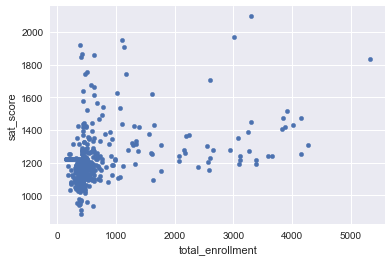

In [120]:
combined_clean.plot.scatter(x="total_enrollment", y="sat_score")
plt.show()

Other than the r-squared value suggests the plot does not confirm a strong correlation. The points are in a great
part dispersed. However there is a cluster of point in the left corner. Taking a look into the cluster.

In [121]:
low_enrollment_cluster = combined_clean[(combined_clean["total_enrollment"] < 1000) 
                                        & (combined_clean['sat_score']<1000)]
low_enrollment_cluster.shape

(12, 160)

In [122]:
low_enrollment_cluster.reset_index()

,level_0,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,Demographic,School Name,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,lat,long,school_dist
0,93,07X334,INTERNATIONAL COMMUNITY HIGH SCHOOL,34,310.0,324.0,311.0,945.0,Total Cohort,INTERNATIONAL COMMUNITY HIGH SCHOOL,...,"345 Brook Avenue\nBronx, NY 10454\n(40.810036192000496, -73.91781248199965)",1.0,8.0,41.0,2000391.0,2.022860e+09,Mott Haven-Port Morris,40.810036,-73.917812,07
1,129,09X365,ACADEMY FOR LANGUAGE AND TECHNOLOGY,54,315.0,339.0,297.0,951.0,0,0,...,"1700 Macombs Road\nBronx, NY 10453\n(40.84910216800046, -73.91608844099966)",5.0,14.0,21502.0,2008460.0,2.028660e+09,University Heights-Morris Heights,40.849102,-73.916088,09
2,130,09X403,BRONX INTERNATIONAL HIGH SCHOOL,49,314.0,312.0,339.0,965.0,Total Cohort,BRONX INTERNATIONAL HIGH SCHOOL,...,"1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)",3.0,16.0,135.0,2004526.0,2.026340e+09,Morrisania-Melrose,40.827603,-73.904475,09
3,143,10X268,KINGSBRIDGE INTERNATIONAL HIGH SCHOOL,52,304.0,356.0,302.0,962.0,Total Cohort,KINGSBRIDGE INTERNATIONAL HIGH SCHOOL,...,"2780 Reservoir Avenue\nBronx, NY 10468\n(40.87037746700048, -73.89816295199967)",7.0,11.0,409.0,2015241.0,2.032470e+09,Van Cortlandt Village,40.870377,-73.898163,10
4,145,10X342,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,49,300.0,333.0,301.0,934.0,Total Cohort,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,...,"2780 Reservoir Avenue\nBronx, NY 10468\n(40.87037746700048, -73.89816295199967)",7.0,11.0,409.0,2015241.0,2.032470e+09,Van Cortlandt Village,40.870377,-73.898163,10
5,180,12X388,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,30,321.0,351.0,298.0,970.0,0,0,...,"1300 Boynton Avenue\nBronx, NY 10472\n(40.83136649000045, -73.87882327699964)",9.0,18.0,56.0,2027459.0,2.038640e+09,West Farms-Bronx River,40.831366,-73.878823,12
6,183,12X550,HIGH SCHOOL OF WORLD CULTURES,42,304.0,323.0,312.0,939.0,Total Cohort,HIGH SCHOOL OF WORLD CULTURES,...,"1300 Boynton Avenue\nBronx, NY 10472\n(40.83136649000045, -73.87882327699964)",9.0,18.0,56.0,2027459.0,2.038640e+09,West Farms-Bronx River,40.831366,-73.878823,12
7,192,13K439,BROOKLYN INTERNATIONAL HIGH SCHOOL,90,305.0,364.0,312.0,981.0,Total Cohort,BROOKLYN INTERNATIONAL HIGH SCHOOL,...,"49 Flatbush Avenue Extension\nBrooklyn, NY 11201\n(40.69717472700046, -73.98495968899965)",2.0,33.0,15.0,3000216.0,3.001200e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,40.697175,-73.984960,13
8,230,17K524,INTERNATIONAL HIGH SCHOOL AT PROSPECT HEIGHTS,71,287.0,335.0,291.0,913.0,Total Cohort,INTERNATIONAL HIGH SCHOOL AT PROSPECT,...,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67029890700047, -73.96164787599963)",9.0,35.0,213.0,3029686.0,3.011870e+09,Crown Heights South,40.670299,-73.961648,17
9,242,18K563,IT TAKES A VILLAGE ACADEMY,56,313.0,320.0,330.0,963.0,Total Cohort,IT TAKES A VILLAGE ACADEMY,...,"5800 Tilden Avenue\nBrooklyn, NY 11203\n(40.64866366300049, -73.92189876199967)",17.0,45.0,936.0,3104598.0,3.047420e+09,Rugby-Remsen Village,40.648664,-73.921899,18


In [123]:
low_enrollment_cluster["ell_percent"]

93     90.1
129    86.6
130    87.1
143    88.7
145    79.9
180    92.9
183    86.4
192    83.1
230    91.0
242    30.4
258    94.6
291    91.3
Name: ell_percent, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


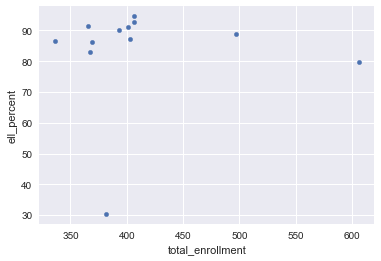

In [124]:
low_enrollment_cluster.plot.scatter(x="total_enrollment", y="ell_percent")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


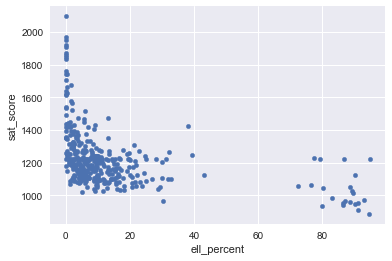

In [125]:
combined_clean.plot.scatter(y="sat_score",x="ell_percent")
plt.show()

Mapping the schools with Basemap

In [126]:
# combined_clean.columns.values

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    resolution='i'
)



longitudes = combined_clean["long"].tolist()
latitudes = combined_clean["lat"].tolist()

x_base,y_base = m(longitudes, latitudes)

print(x_base[0:3])
print(y_base[0:3])


[30075.42917439067, 30126.958547058737, 30322.12601128407]
[31887.35580058396, 31677.27042491082, 34237.57823754754]


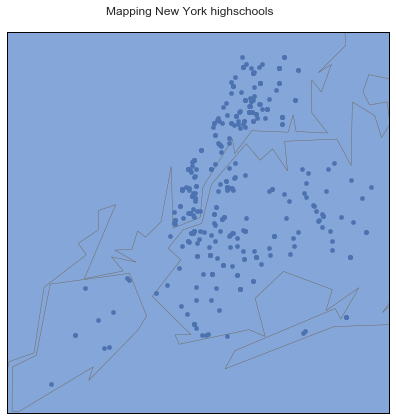

In [127]:
fig = plt.figure(figsize=(10, 7))
fig.suptitle("Mapping New York highschools", y=0.93)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)

plt.show()

Displaying meaningful the percentage of English language learners by area.

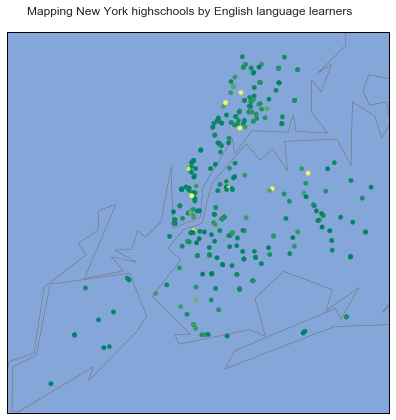

In [128]:
# combined_clean.columns.values
fig_2 = plt.figure(figsize=(10, 7))
fig_2.suptitle("Mapping New York highschools by English language learners", y=0.93)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined_clean['ell_percent'], cmap="summer")
plt.show()

Aggregating by district, which enables to plot ell_percent district-by-district instead of school-by-school.

In [129]:
district = combined_clean.groupby("school_dist").agg("mean")
district.reset_index(inplace=True)
print(district.shape)
district.head(3)
district.loc[0:5, 'ell_percent']

(32, 86)


0    10.000000
1    12.536000
2     9.025000
3     4.557143
4     4.157143
5    30.040000
Name: ell_percent, dtype: float64

In [130]:
# district.columns.values
longitudes_avg_district = list(district["long"])
latitudes_avg_district = list(district["lat"])
longitudes_avg_district[0:3]

[-73.982377200666335, -73.991099417559681, -73.97737016149965]

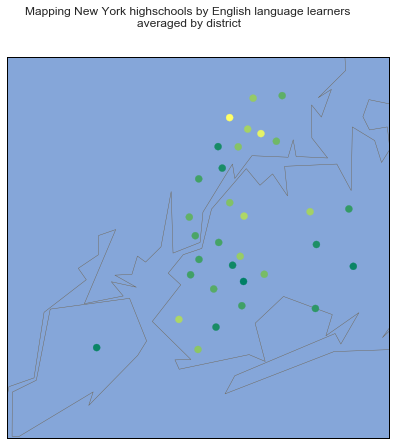

In [131]:

fig_3 = plt.figure(figsize=(10, 7))
fig_3.suptitle("Mapping New York highschools by English language learners \naveraged by district", y=0.98)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

m.scatter(longitudes_avg_district, latitudes_avg_district, s=50, zorder=2, 
          latlon=True, c=district['ell_percent'], cmap="summer")
plt.show()

Researching correlations between sat_score and survey variables of parents, teachers, 
and students (2011 NYC School Survey)

In [132]:
# combined_clean.columns.values
survey_variables = ['rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11', 'com_p_11', 'eng_p_11', 
                    'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11',
                    'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11', 'eng_tot_11','aca_tot_11']

survey_variables

['rr_s',
 'rr_t',
 'rr_p',
 'N_s',
 'N_t',
 'N_p',
 'saf_p_11',
 'com_p_11',
 'eng_p_11',
 'aca_p_11',
 'saf_t_11',
 'com_t_11',
 'eng_t_11',
 'aca_t_11',
 'saf_s_11',
 'com_s_11',
 'eng_s_11',
 'aca_s_11',
 'saf_tot_11',
 'com_tot_11',
 'eng_tot_11',
 'aca_tot_11']

In [133]:
survey_variables.append('sat_score')

In [134]:
# combined_clean.columns.values
df_sat_survey = combined_clean[survey_variables]
df_sat_survey.head()

,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,aca_p_11,...,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11,sat_score
0,89.0,70,39,379.000000,26.0,151.0,7.8,7.7,7.4,7.6,...,6.5,6.000000,5.6,6.100000,6.700000,6.7,6.2,6.6,7.0,1122.0
1,84.0,95,10,385.000000,37.0,46.0,7.9,7.4,7.2,7.3,...,7.3,6.000000,5.7,6.300000,7.000000,6.8,6.3,6.7,7.2,1172.0
2,0.0,98,28,594.682192,42.0,150.0,8.7,8.2,8.1,8.4,...,8.8,6.612055,6.1,6.624384,7.384384,7.9,7.9,7.9,8.4,1149.0
3,90.0,100,21,306.000000,29.0,69.0,7.7,7.4,7.2,7.3,...,6.8,6.400000,5.9,6.400000,7.000000,6.9,6.2,6.6,7.0,1207.0
4,98.0,68,51,923.000000,67.0,736.0,8.5,7.9,7.9,8.4,...,7.3,7.300000,6.4,7.000000,7.700000,7.8,6.7,6.9,7.8,1621.0


In [135]:
df_sat_survey_corr = df_sat_survey.corr()
df_sat_survey_corr_subset_1 = df_sat_survey_corr["sat_score"]
df_sat_survey_corr_subset_2 = df_sat_survey_corr_subset.sort_values(ascending=False)
# print(df_sat_survey_corr_subset_2)
df_sat_survey_corr_subset_3 = df_sat_survey_corr_subset_2[1:23]
df_sat_survey_corr_subset = df_sat_survey_corr_subset_3 
print(df_sat_survey_corr_subset)

NameError: name 'df_sat_survey_corr_subset' is not defined

In [ ]:
df_sat_survey_corr_subset.plot(kind="bar", title="Correlations of survey variables with sat score",
                               figsize=(10,7))
plt.show()

N_s, Number of student respondents is first, followed by N_p, Number of parent respondents. These correlations 
are pointing not immediately to a theoretical valuable relationship. Maybe the number of respondents point out to
a higher committment. However aca_p_1, Academic expectations score based on parent responses and 
saf_t_10, Safety and Respect score based on teacher responses, can point that parent committment and safety / respect correlates positively wit successful sat scores.





Investigate gender differences in SAT scores.

In [ ]:
df_gender = combined_clean.loc[0:5,["sat_score", "male_per", "female_per"]]
df_gender.head()

In [ ]:
df_gender_corr = df_gender.corr()
df_gender_corr_sat = df_gender_corr.iloc[1:3,0]
df_gender_corr_sat

Making a bar plot of the correlations between the columns above and sat_score

In [ ]:
df_gender_corr_sat.plot(kind="bar", title="Correlations between gender and sat scores")
plt.show()

There is strong correlations between gender and sat scores. For men it is negative and for female positve. 
It is diametrically opposed.

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
combined_clean.plot("male_per", "sat_score",ax=axes[0], kind="scatter", figsize=(13,7))
combined_clean.plot("female_per", "sat_score", ax=axes[1], kind="scatter", figsize=(13,7))
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(18.5, 10.5)
sns.regplot("male_per", "sat_score",data=combined_clean, fit_reg=True, ax=axes[0])
sns.regplot("female_per", "sat_score",data=combined_clean, fit_reg=True, ax=axes[1])

plt.show()

Both plot do not confirm the relationships by the correlation coefficients. 
Both plot look similar in the cluster areas between 40 and 60. 


Exploring correlation of AP exams with SAT scores. The Ap taker percentage is calculated to avoid interaction
effects as total enrollment is also related to SAT scores.

In [ ]:
combined_clean["ap_per"] = combined_clean["AP Test Takers"] / combined_clean["total_enrollment"]

In [ ]:
correlation_coefficient_54 = combined_clean["ap_per"].corr(combined_clean["sat_score"])
correlation_coefficient_54 

The correlation coefficient is around 0. This indicates the lack of a relationship.

In [ ]:
combined_clean.plot("ap_per", "total_enrollment", kind="scatter")
plt.show()

The image confirms this as it difficult to draw a regression line with satisfying SSR.